Following code imports essential Python libraries for data analysis, visualization, and time series decomposition:



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
from statsmodels.tsa.seasonal import STL

In [2]:
df = pd.read_csv('product_usage_data.csv')
df.head()

,timestamp,daily_active_users
0,1/1/2024,1107
1,1/2/2024,1113
2,1/3/2024,1143
3,1/4/2024,1140
4,1/5/2024,1136


In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [4]:
df.head()


,timestamp,daily_active_users
0,2024-01-01,1107
1,2024-01-02,1113
2,2024-01-03,1143
3,2024-01-04,1140
4,2024-01-05,1136


In [5]:
dau = pd.Series(data=df['daily_active_users'].values, index=df['timestamp'])


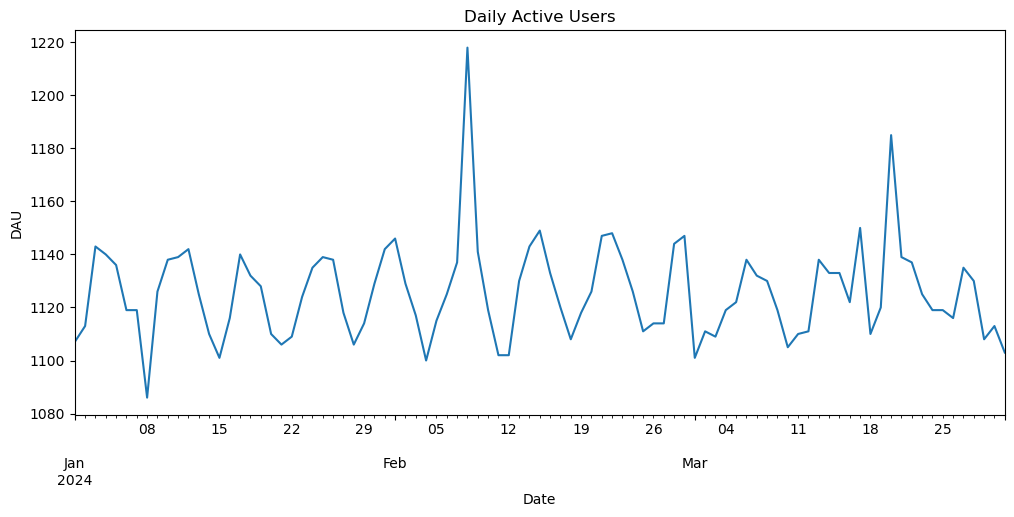

In [6]:
# prompt: Plot dau using matplot lib

dau.plot(figsize=(12,5))
plt.xlabel("Date")
plt.ylabel("DAU")
plt.title("Daily Active Users")
plt.show()

In [7]:
dau.describe()


count      91.000000
mean     1125.703297
std        18.362700
min      1086.000000
25%      1113.000000
50%      1125.000000
75%      1138.000000
max      1218.000000
dtype: float64

In [8]:
stl = STL(dau, period=7)  # weekly seasonality
res = stl.fit()



In [9]:
# prompt: print next line useing res.seasona, res.trend just 3-4 lines not whole code

print(res.seasonal)
print (res.trend)
print (res.resid)

timestamp
2024-01-01   -29.112699
2024-01-02    -9.007788
2024-01-03    16.681902
2024-01-04    10.810216
2024-01-05    13.981569
                ...    
2024-03-27    26.987993
2024-03-28     6.704833
2024-03-29    -0.830159
2024-03-30    -1.994414
2024-03-31    -2.578938
Name: season, Length: 91, dtype: float64
timestamp
2024-01-01    1128.320578
2024-01-02    1127.468131
2024-01-03    1126.682798
2024-01-04    1125.964042
2024-01-05    1125.315609
                 ...     
2024-03-27    1119.600989
2024-03-28    1116.557829
2024-03-29    1113.511075
2024-03-30    1110.462253
2024-03-31    1107.416218
Name: trend, Length: 91, dtype: float64
timestamp
2024-01-01     7.792122
2024-01-02    -5.460343
2024-01-03    -0.364701
2024-01-04     3.225742
2024-01-05    -3.297178
                ...    
2024-03-27   -11.588982
2024-03-28     6.737338
2024-03-29    -4.680917
2024-03-30     4.532161
2024-03-31    -1.837280
Name: resid, Length: 91, dtype: float64


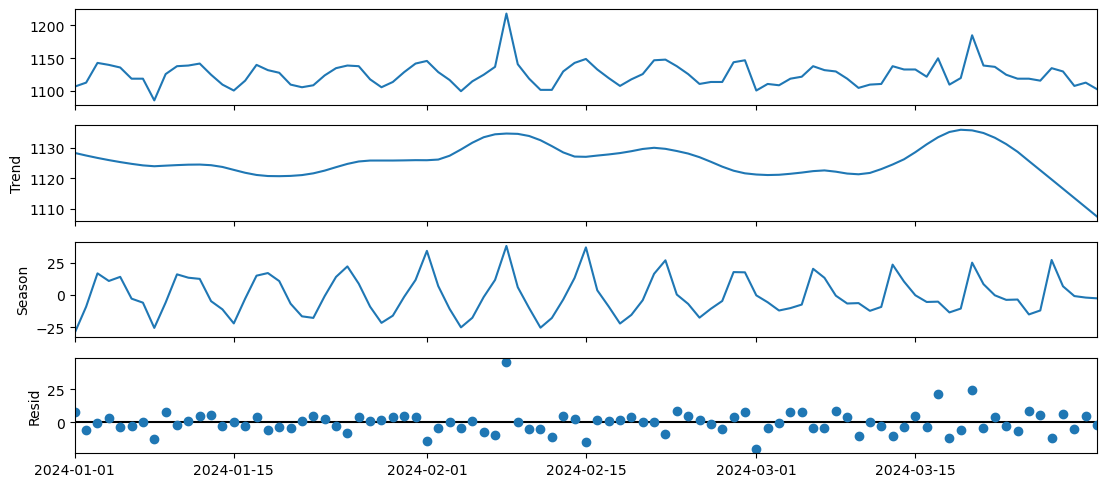

In [10]:
# prompt: plot 4 components, original, residual, trend, and noise using matplotlib

fig = res.plot()
fig.set_size_inches(12, 5)
plt.show()

<Axes: title={'center': 'Residuals'}, xlabel='timestamp'>

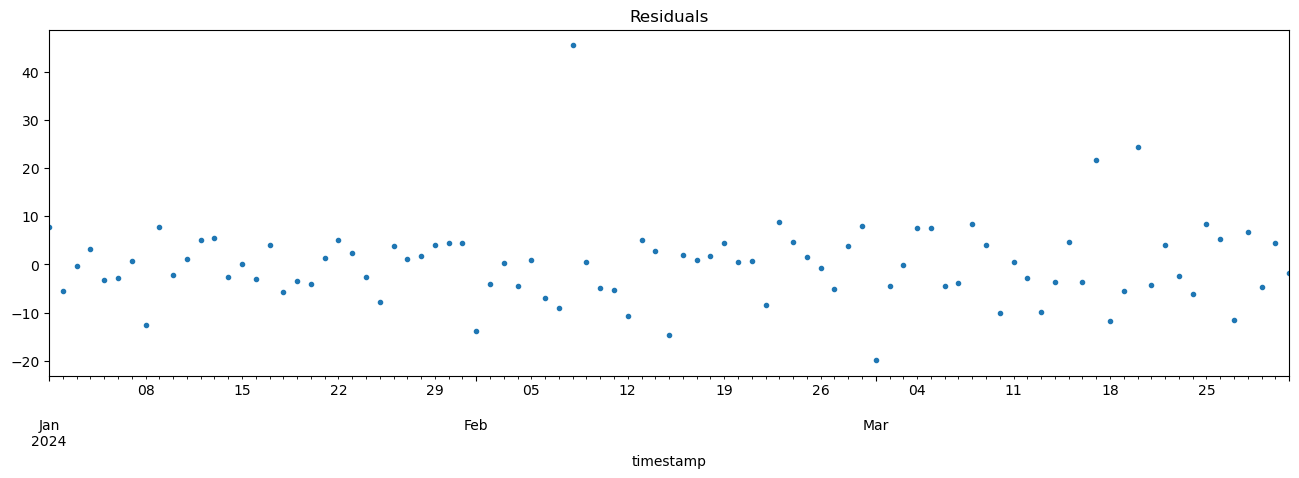

In [11]:
res.resid.plot(marker='.', linestyle='none', figsize=(16,4.5), title='Residuals')


In [12]:
trend_iv_l_minor = pd.Series(data=res.trend.values-np.mean(res.trend)-np.std(res.resid), index=res.trend.index)
trend_iv_u_minor = pd.Series(data=res.trend.values-np.mean(res.trend)+np.std(res.resid), index=res.trend.index)\

trend_iv_l_major = pd.Series(data=res.trend.values-np.mean(res.trend)-2*np.std(res.resid), index=res.trend.index)
trend_iv_u_major = pd.Series(data=res.trend.values-np.mean(res.trend)+2*np.std(res.resid), index=res.trend.index)

trend_iv_l_severe = pd.Series(data=res.trend.values-np.mean(res.trend)-3*np.std(res.resid), index=res.trend.index)
trend_iv_u_severe = pd.Series(data=res.trend.values-np.mean(res.trend)+3*np.std(res.resid), index=res.trend.index)

In [13]:
minor_anom = np.where((res.resid < trend_iv_l_minor) | (res.resid > trend_iv_u_minor), res.resid, np.nan)
major_anom = np.where((res.resid < trend_iv_l_major) | (res.resid > trend_iv_u_major), res.resid, np.nan)
severe_anom = np.where((res.resid < trend_iv_l_severe) | (res.resid > trend_iv_u_severe), res.resid, np.nan)

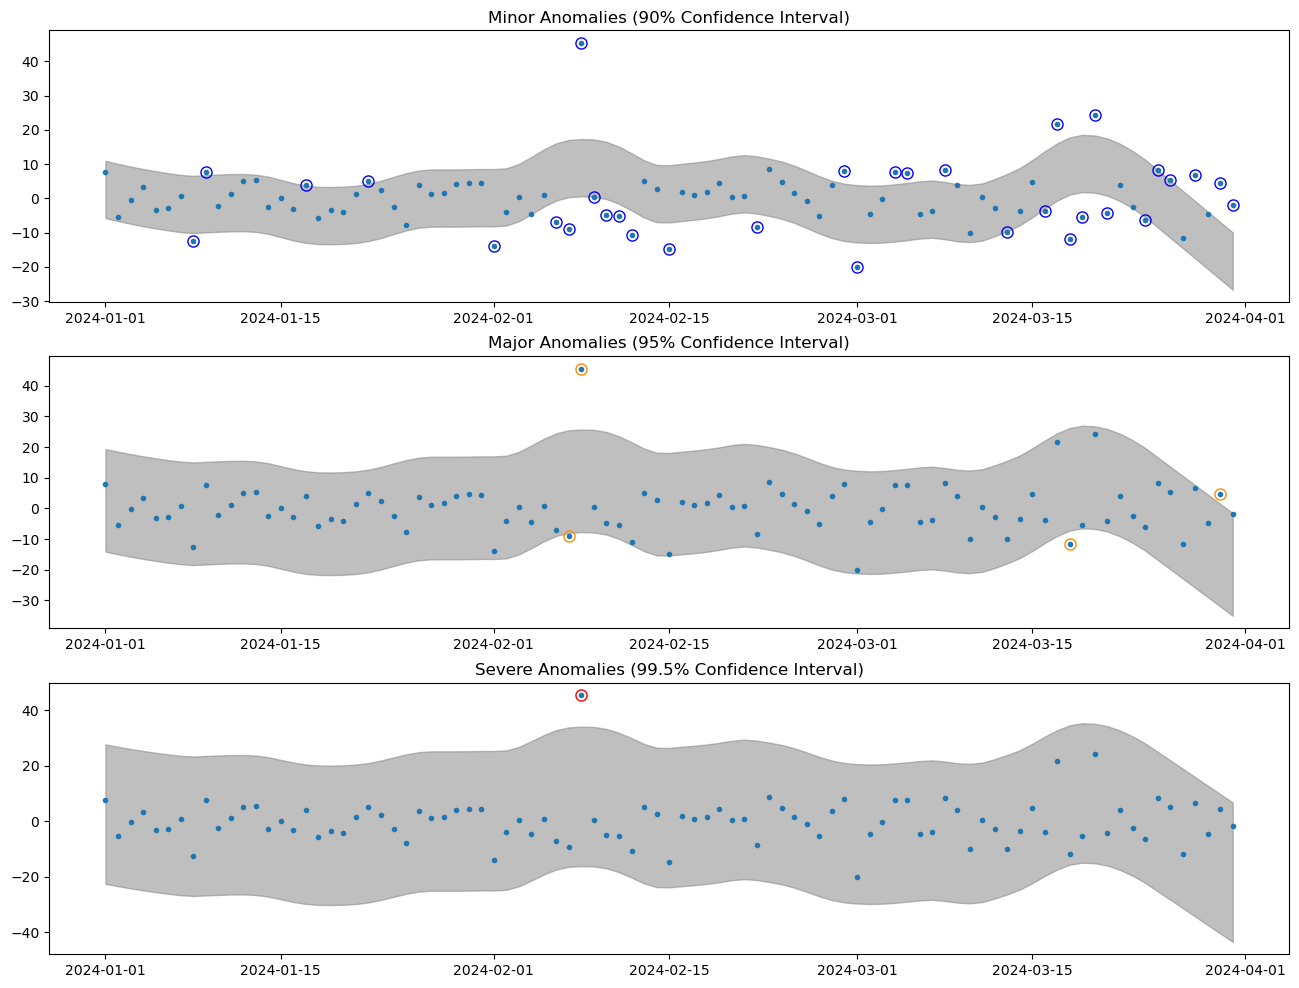

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(16, 12))
ax1.plot(res.resid, marker='.', linestyle='none', label='Residuals')
ax1.plot(pd.Series(minor_anom, res.resid.index), marker='o', linestyle='none', label='Residuals', color='blue', fillstyle='none', markersize=8)
ax1.set_title('Minor Anomalies (90% Confidence Interval)')
ax1.fill_between(res.resid.index, trend_iv_l_minor, trend_iv_u_minor, color='grey', alpha=0.5, label='confidence interval')

ax2.plot(res.resid, marker='.', linestyle='none', label='Residuals')
ax2.plot(pd.Series(major_anom, res.resid.index), marker='o', linestyle='none', label='Residuals',  color='darkorange', fillstyle='none', markersize=8)
ax2.set_title('Major Anomalies (95% Confidence Interval)')
ax2.fill_between(res.resid.index, trend_iv_l_major, trend_iv_u_major, color='grey', alpha=0.5, label='confidence interval')

ax3.plot(res.resid, marker='.', linestyle='none', label='Residuals')
ax3.plot(pd.Series(severe_anom, res.resid.index), marker='o', linestyle='none', label='Residuals',  color='red', fillstyle='none', markersize=8)
ax3.set_title('Severe Anomalies (99.5% Confidence Interval)')
ax3.fill_between(res.resid.index, trend_iv_l_severe, trend_iv_u_severe, color='grey', alpha=0.5, label='confidence interval')

In [15]:
ax1.plot(minor_anom, marker='.', linestyle='none', label='Anomalies')


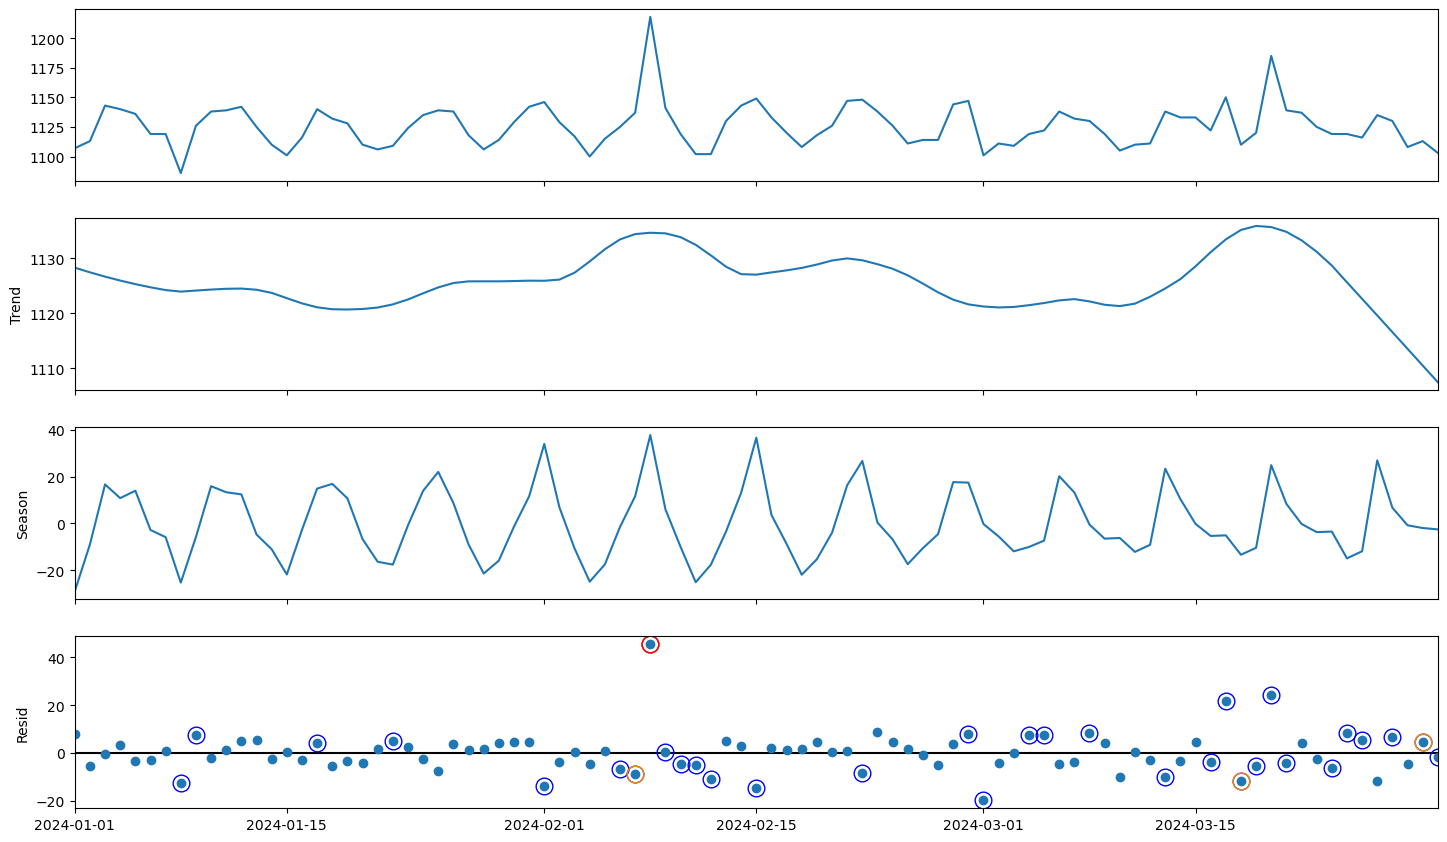

In [16]:
stl = STL(dau)
res = stl.fit()

# Plot residuals
fig = res.plot()
fig.set_size_inches((16, 9))

# Get the residuals axes (it's the last one in the STL plot)
data_ax = fig.get_axes()[0]
resid_ax = fig.get_axes()[-1]

# Highlight anomalies in the residuals plot
resid_ax.plot(res.resid.index, minor_anom, 'o', color='b', fillstyle='none', markersize=12)
resid_ax.plot(res.resid.index, major_anom, 'o', color='darkorange', fillstyle='none', markersize=12)
resid_ax.plot(res.resid.index, severe_anom, 'o', color='r', fillstyle='none', markersize=12)

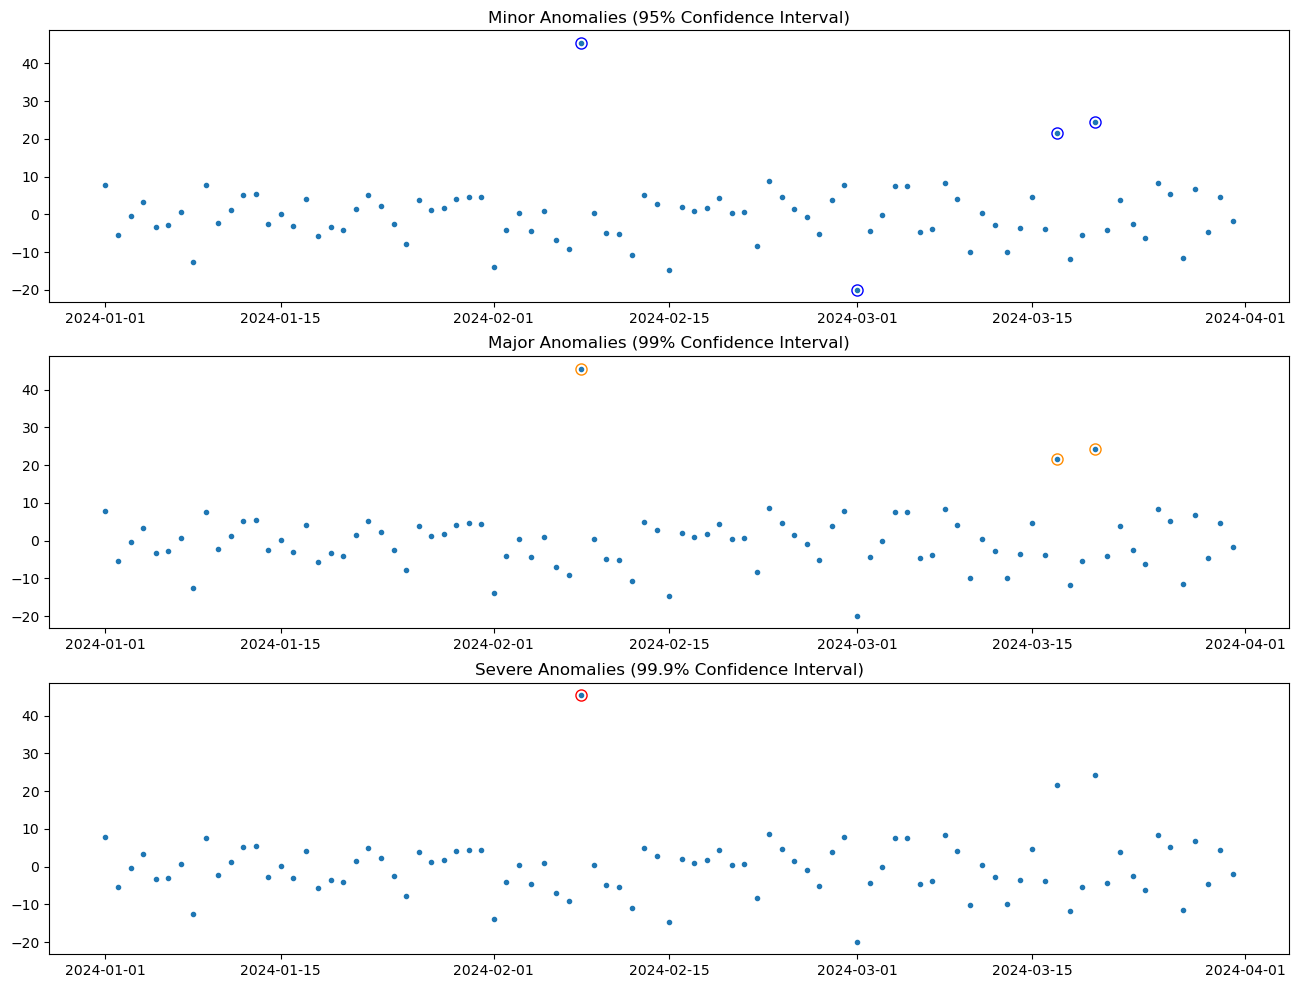

In [17]:
# prompt: use z score to detect anomalies in above data. not working following code

from scipy.stats import zscore

# Calculate z-scores for the residuals
res.resid.index = pd.to_datetime(res.resid.index)
z_scores = zscore(res.resid)

# Define thresholds for anomaly detection
threshold_minor = 1.96  # ~95% confidence interval
threshold_major = 2.58  # ~99% confidence interval
threshold_severe = 3.29 # ~99.9% confidence interval

# Identify anomalies based on z-scores
minor_anom = res.resid[(z_scores > threshold_minor) | (z_scores < -threshold_minor)]
major_anom = res.resid[(z_scores > threshold_major) | (z_scores < -threshold_major)]
severe_anom = res.resid[(z_scores > threshold_severe) | (z_scores < -threshold_severe)]


#Plot the results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(16, 12))

ax1.plot(res.resid, marker='.', linestyle='none', label='Residuals')
ax1.plot(minor_anom.index, minor_anom.values, marker='o', linestyle='none', label='Anomalies', color='blue', fillstyle='none', markersize=8)
ax1.set_title('Minor Anomalies (95% Confidence Interval)')


ax2.plot(res.resid, marker='.', linestyle='none', label='Residuals')
ax2.plot(major_anom.index, major_anom.values, marker='o', linestyle='none', label='Anomalies',  color='darkorange', fillstyle='none', markersize=8)
ax2.set_title('Major Anomalies (99% Confidence Interval)')


ax3.plot(res.resid, marker='.', linestyle='none', label='Residuals')
ax3.plot(severe_anom.index, severe_anom.values, marker='o', linestyle='none', label='Anomalies',  color='red', fillstyle='none', markersize=8)
ax3.set_title('Severe Anomalies (99.9% Confidence Interval)')

plt.show()

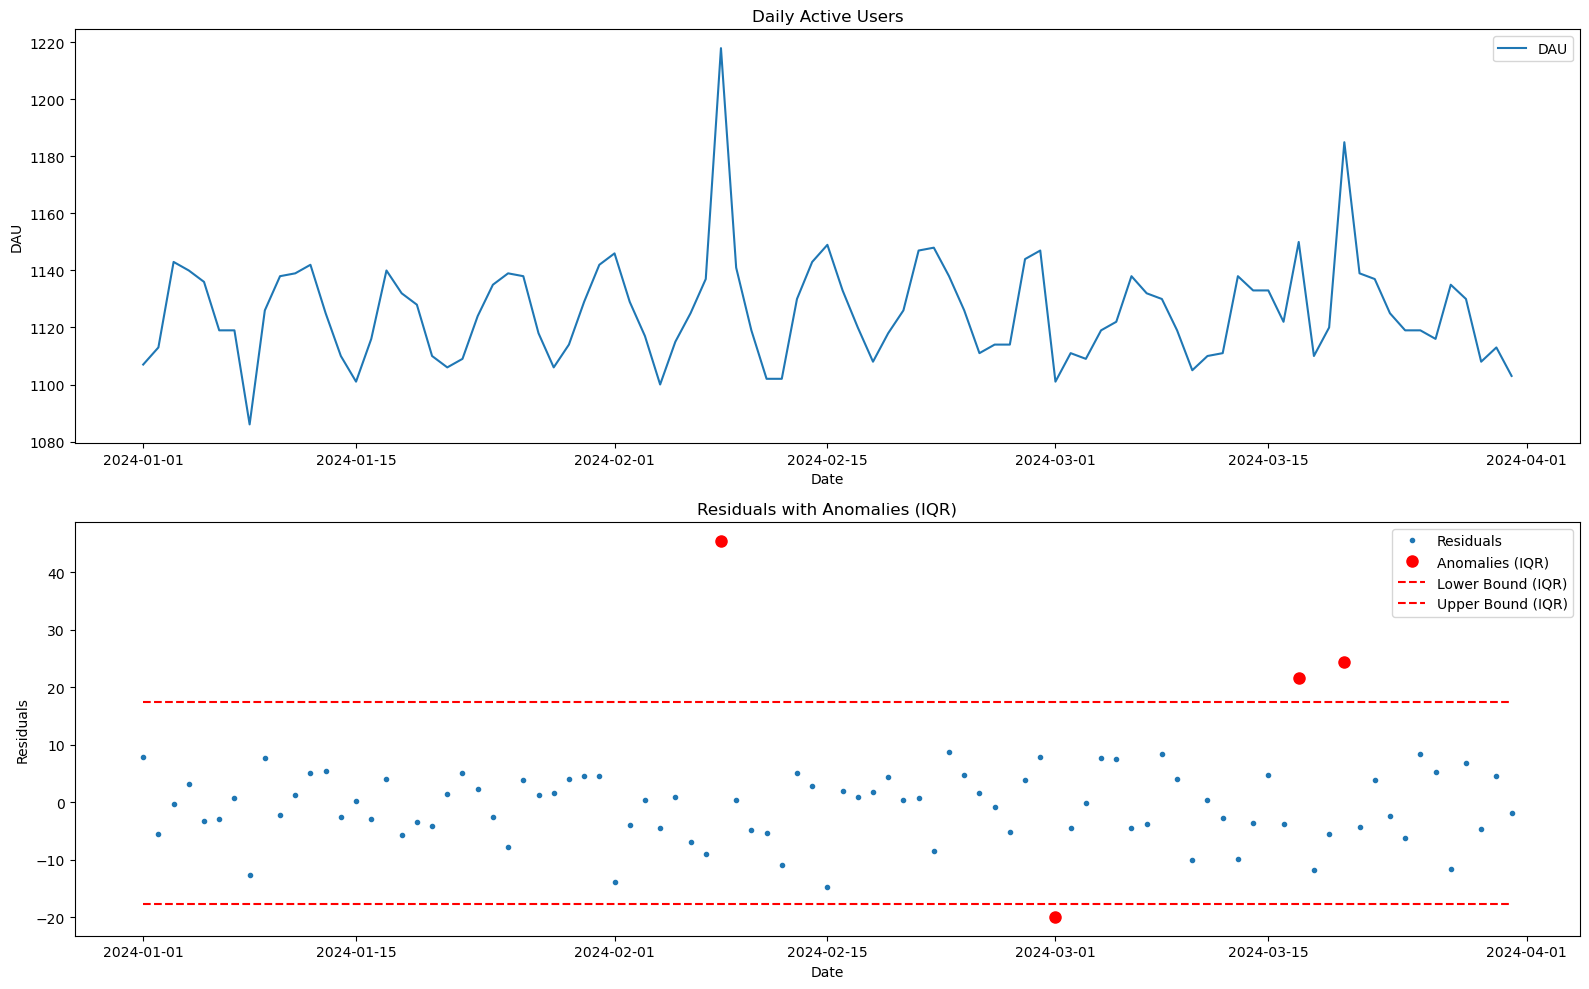

In [18]:
# prompt: Use IQR to detect anomalies in the above code.
# Plot everything residuals and original series

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from scipy.stats import iqr

# Assuming 'dau' is your time series data (Daily Active Users)
# If not, replace 'dau' with your actual time series data
# Example: dau = pd.Series(data=your_data, index=your_index)

stl = STL(dau, period=7)  # weekly seasonality
res = stl.fit()

# Calculate IQR for residuals
Q1 = res.resid.quantile(0.25)
Q3 = res.resid.quantile(0.75)
IQR = iqr(res.resid)

# Define bounds for anomaly detection using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify anomalies
anomalies = res.resid[(res.resid < lower_bound) | (res.resid > upper_bound)]

# Plot the original series and residuals with anomalies highlighted
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Plot original series (DAU)
ax1.plot(dau, label="DAU")
ax1.set_title("Daily Active Users")
ax1.set_xlabel("Date")
ax1.set_ylabel("DAU")
ax1.legend()


#Plot Residuals with Anomalies
ax2.plot(res.resid, marker='.', linestyle='none', label="Residuals")
ax2.plot(anomalies.index, anomalies.values, 'ro', markersize=8, label="Anomalies (IQR)")
ax2.set_title("Residuals with Anomalies (IQR)")
ax2.set_xlabel("Date")
ax2.set_ylabel("Residuals")
ax2.hlines(lower_bound, xmin=res.resid.index.min(), xmax=res.resid.index.max(), color='red', linestyle='--', label="Lower Bound (IQR)")
ax2.hlines(upper_bound, xmin=res.resid.index.min(), xmax=res.resid.index.max(), color='red', linestyle='--', label="Upper Bound (IQR)")

ax2.legend()

plt.tight_layout()
plt.show()

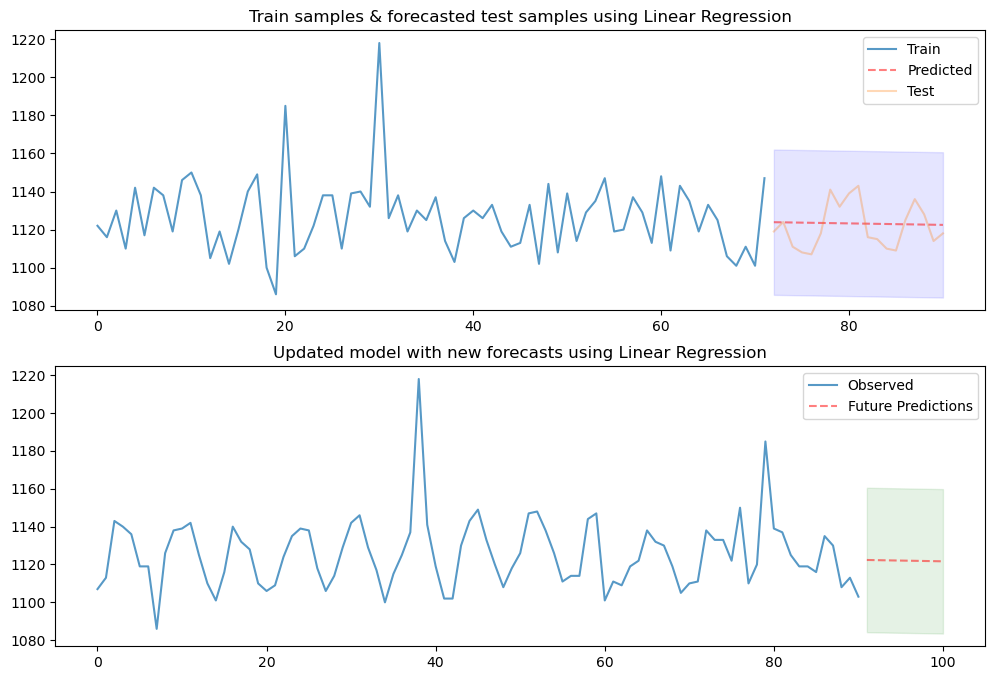

MSE for Linear Regression Forecast: 133.6046


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Splitting data into train and test
train, test = train_test_split(dau.values, train_size=0.8, random_state=42)

# Creating time indices as features for regression
train_indices = np.arange(len(train)).reshape(-1, 1)
test_indices = np.arange(len(train), len(train) + len(test)).reshape(-1, 1)

# Training linear regression model
model = LinearRegression()
model.fit(train_indices, train)

# Making predictions
preds = model.predict(test_indices)

# Calculating confidence intervals (assuming normal distribution of residuals)
residuals = train - model.predict(train_indices)
std_dev = np.std(residuals)
conf_int = np.column_stack((preds - 1.96 * std_dev, preds + 1.96 * std_dev))

# Plotting results
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
x_axis = np.arange(len(train) + len(test))
axes[0].plot(x_axis[:len(train)], train, alpha=0.75, label="Train")
axes[0].plot(x_axis[len(train):], preds, alpha=0.5, linestyle='--', color='r', label="Predicted")
axes[0].plot(x_axis[len(train):], test, alpha=0.3, label="Test")
axes[0].fill_between(x_axis[len(train):], conf_int[:, 0], conf_int[:, 1], alpha=0.1, color='b')
axes[0].set_title("Train samples & forecasted test samples using Linear Regression")
axes[0].legend()

# Detecting anomalies
anomalies = (test < conf_int[:, 0]) | (test > conf_int[:, 1])
axes[0].scatter(x_axis[len(train):][anomalies], test[anomalies], color='red', label="Anomalies")

# Updating model with test data and predicting future values
new_indices = np.arange(len(dau.values), len(dau.values) + 10).reshape(-1, 1)
new_preds = model.predict(new_indices)
new_conf_int = np.column_stack((new_preds - 1.96 * std_dev, new_preds + 1.96 * std_dev))

axes[1].plot(np.arange(len(dau.values)), dau, alpha=0.75, label="Observed")
axes[1].plot(new_indices, new_preds, alpha=0.5, linestyle='--', color='r', label="Future Predictions")
axes[1].fill_between(new_indices.flatten(), new_conf_int[:, 0], new_conf_int[:, 1], alpha=0.1, color='g')
axes[1].set_title("Updated model with new forecasts using Linear Regression")
axes[1].legend()
plt.show()

# Compute MSE
mse_linear = mean_squared_error(test, preds)
print(f"MSE for Linear Regression Forecast: {mse_linear:.4f}")

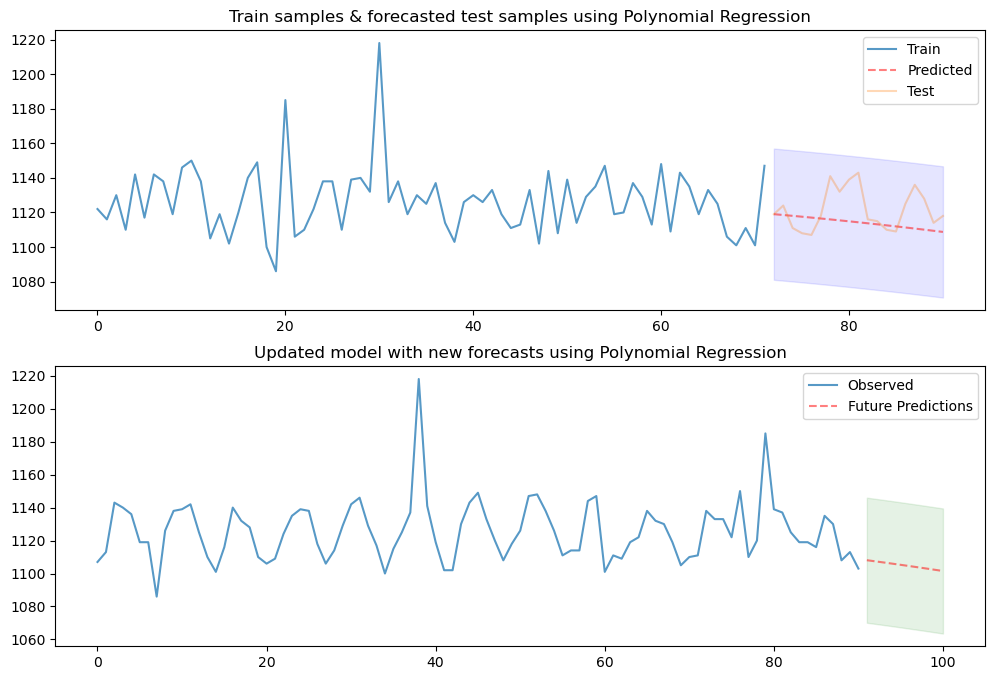

MSE for Polynomial Regression Forecast (degree=2): 203.0213


In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Splitting data into train and test
train, test = train_test_split(dau.values, train_size=0.8, random_state=42)

# Creating time indices as features for regression
train_indices = np.arange(len(train)).reshape(-1, 1)
test_indices = np.arange(len(train), len(train) + len(test)).reshape(-1, 1)

# Transforming features for polynomial regression
degree = 2  # You can adjust the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
train_poly = poly.fit_transform(train_indices)
test_poly = poly.transform(test_indices)

# Training polynomial regression model
model = LinearRegression()
model.fit(train_poly, train)

# Making predictions
preds = model.predict(test_poly)

# Calculating confidence intervals (assuming normal distribution of residuals)
residuals = train - model.predict(train_poly)
std_dev = np.std(residuals)
conf_int = np.column_stack((preds - 1.96 * std_dev, preds + 1.96 * std_dev))

# Plotting results
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
x_axis = np.arange(len(train) + len(test))
axes[0].plot(x_axis[:len(train)], train, alpha=0.75, label="Train")
axes[0].plot(x_axis[len(train):], preds, alpha=0.5, linestyle='--', color='r', label="Predicted")
axes[0].plot(x_axis[len(train):], test, alpha=0.3, label="Test")
axes[0].fill_between(x_axis[len(train):], conf_int[:, 0], conf_int[:, 1], alpha=0.1, color='b')
axes[0].set_title("Train samples & forecasted test samples using Polynomial Regression")
axes[0].legend()

# Detecting anomalies
anomalies = (test < conf_int[:, 0]) | (test > conf_int[:, 1])
axes[0].scatter(x_axis[len(train):][anomalies], test[anomalies], color='red', label="Anomalies")

# Updating model with test data and predicting future values
new_indices = np.arange(len(dau.values), len(dau.values) + 10).reshape(-1, 1)
new_poly = poly.transform(new_indices)
new_preds = model.predict(new_poly)
new_conf_int = np.column_stack((new_preds - 1.96 * std_dev, new_preds + 1.96 * std_dev))

axes[1].plot(np.arange(len(dau.values)), dau, alpha=0.75, label="Observed")
axes[1].plot(new_indices, new_preds, alpha=0.5, linestyle='--', color='r', label="Future Predictions")
axes[1].fill_between(new_indices.flatten(), new_conf_int[:, 0], new_conf_int[:, 1], alpha=0.1, color='g')
axes[1].set_title("Updated model with new forecasts using Polynomial Regression")
axes[1].legend()
plt.show()

# Compute MSE
mse_poly = mean_squared_error(test, preds)
print(f"MSE for Polynomial Regression Forecast (degree={degree}): {mse_poly:.4f}")
